# **NASA Exoplanet Archive Data Analysis**
***
## Before we start
This project is intended as a learning experience so that I can gain more experience with some of the many widely used data analysis libraries python has to offer. I chose the 'NASA Exoplanet Archive' as my dataset out of pure interest, and I aim to produce potentially useful and interesting conclusions about this set by analyzing correlations and creating visualizations of connections between variables. I am not yet at the level where I can incorporate machine learning algorithms into my analysis. Because of this, the following analysis might be rather surface level or basic. I plan to update it and perform further analyses on both this, and other datasets.
***
## Cleaning data
As of the day this data has been exported (2024/02/07), the NASA Exoplanet Archive boasts a total of 5572 *confirmed* planets. However, examining the raw data with the assumption a planet per row, it seems as if there are over 35000. Some of these are duplicates and added into the dataset based on different publications that cover exoplanetary data. The dates of which these are published span decades, so I took data from bottom-most publication. By choosing only these rows for the data, it should be that our shape takes on a height of exactly 5572 rows, one for each planet. Columns will also be looked into and only those relevant to what I am looking into will be kept. It can be observed that the amount of columns drops from 30 to 21 after cleaning the data.
***

In [42]:
import pandas as pd

#Get dataframe
df = pd.read_csv("planets.csv", sep=",", comment="#")

#Get unneeded columns -> drop
to_drop = ['default_flag', 'soltype', 'pl_controv_flag', 'pl_refname', 
           'ttv_flag', 'sy_refname', 'sy_vmag', 'sy_kmag', 'sy_gaiamag']
clean_df = df.drop(columns=to_drop)

#Read duplicates by name; use most recent reference data -> furthest down option
clean_df = clean_df.drop_duplicates(subset=['pl_name'], keep='last')

#Cleaned data -> seperate csv file
clean_data_path = 'clean_planets.csv'
clean_df.to_csv(clean_data_path, index=False)
planets = pd.read_csv("clean_planets.csv", sep=",")

#Output visual representation of cleaned data
print("=" * 90)
print(f"Raw data set: \n\n{df.head} \n\nOriginal DF size: \n    {df.shape}")
print("=" * 90)
print("=" * 90)
print(f"Cleaned data set: \n\n{planets.head} \n\nCleaned DF size: \n    {planets.shape}")
print("=" * 90)

Raw data set: 

<bound method NDFrame.head of        loc_rowid    pl_name hostname  default_flag  sy_snum  sy_pnum  \
0              1   11 Com b   11 Com             0        2        1   
1              2   11 Com b   11 Com             0        2        1   
2              3   11 Com b   11 Com             1        2        1   
3              4   11 UMi b   11 UMi             1        1        1   
4              5   11 UMi b   11 UMi             0        1        1   
...          ...        ...      ...           ...      ...      ...   
35195      35196  ups And d  ups And             0        2        3   
35196      35197  ups Leo b  ups Leo             1        1        1   
35197      35198   xi Aql b   xi Aql             0        1        1   
35198      35199   xi Aql b   xi Aql             0        1        1   
35199      35200   xi Aql b   xi Aql             1        1        1   

       discoverymethod  disc_year              soltype  pl_controv_flag  ...  \
0      Ra

# What is orbital eccentricity?
***
Eccentricity values represent to what extent the orbit of a body is elliptical around another body. 
<br>The following equation,
$$ 
e  =  0
$$
where e is eccentricity, represents a perfectly circular orbit. 
<br>The following inequality,
$$
0 < e < 1
$$
demonstrates how far from a circular orbit a body's orbit deviates. The closer e tends toward 1, the more oval-shaped an orbit will become.
Furthermore, we can look at orbital eccentricities which are larger than 1. <br>The following equation and inequality,
$$
e = 1, \; e > 1
$$
demonstrates cases where e has become great enough to escape the gravity of the central object it orbits. It will be pulled in by the gravity of the second body and fly away on the other side. An e value of 1 represents a *parabolic* trajectory, while for e values greater than 1 this trajectory becomes *hyperbolic*.
***

## Plotting Orbital Period vs Orbital Eccentricity
***
One of the first things I am interested in is correlations between orbital eccentricity and other variables in the data. I found a figure from a book published in 2009 (mentioned in sources) which briefly looks at graphs plotted between orbital period vs orbital eccentricity, or planet mass vs orbital eccentricity. Thousands of new planets have been discovered since 2009, so the goal was to see if the shape of the graph had remained mostly the same. 

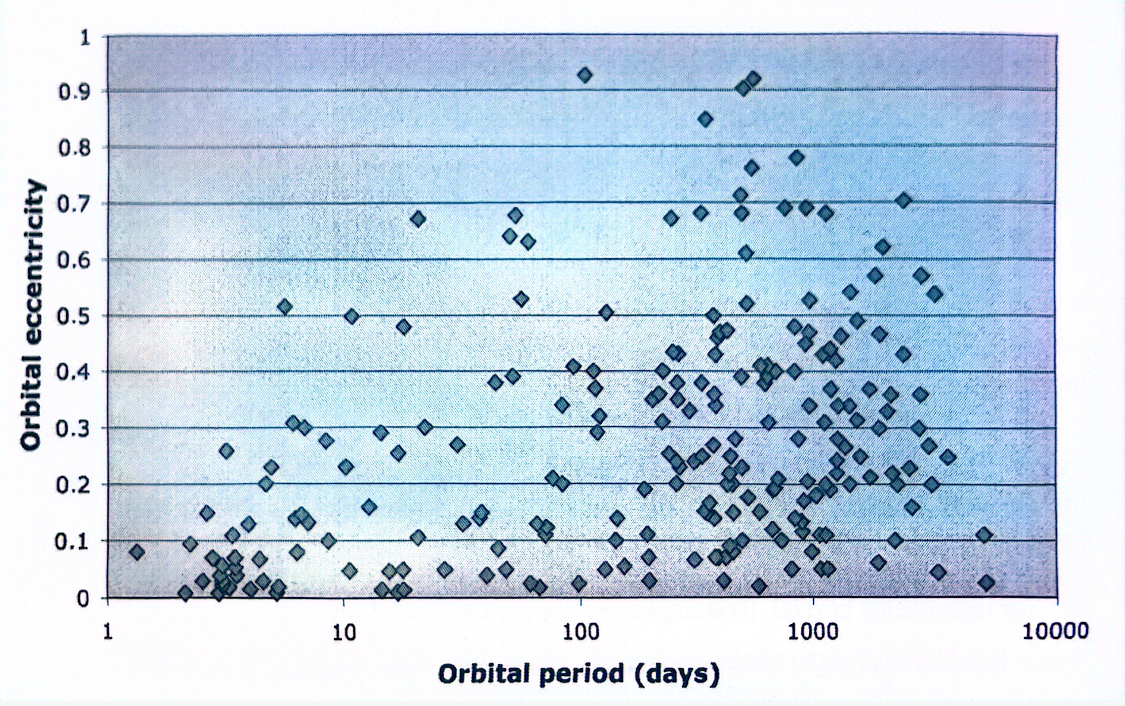 &ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp;&ensp; Fig 1. Orbital eccentricity as a function of orbital period (Ollivier, 78)

Using the cleaned data, we can take a random sample of planets and plot their 'pl_orbper' value against their 'pl_orbeccen' which gives the following result below.

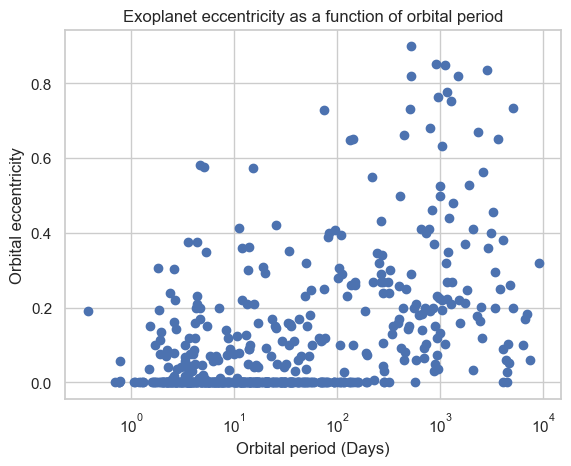

In [93]:
import matplotlib.pyplot as plt
import pandas as pd

#Import cleaned data -> filter range for the graph
df = pd.read_csv("clean_planets.csv", sep=",")
df_adjust = df[(df['pl_orbper'] >= 0) & (df['pl_orbper'] <= 10000)]

#Grab a random sample of 1000 rows of data
rand_sc = df_adjust.sample(n=1000, random_state=12)

#Plot eccentricity as y, orbital period as x
x = rand_sc['pl_orbper']
y = rand_sc['pl_orbeccen']

#Scatter the data
plt.scatter(x, y)

#Label the plot
plt.xlabel("Orbital period (Days)")
plt.ylabel("Orbital eccentricity")
plt.title("Exoplanet eccentricity as a function of orbital period")

#Set ticks to make visual easier to understand
plt.xticks([1, 10, 100, 1000, 10000], ['1', '10', '100', '1000', '10000'])
plt.xscale('log')

plt.show()

This reveals a similar graph to the one proposed in Ollivier's publication.

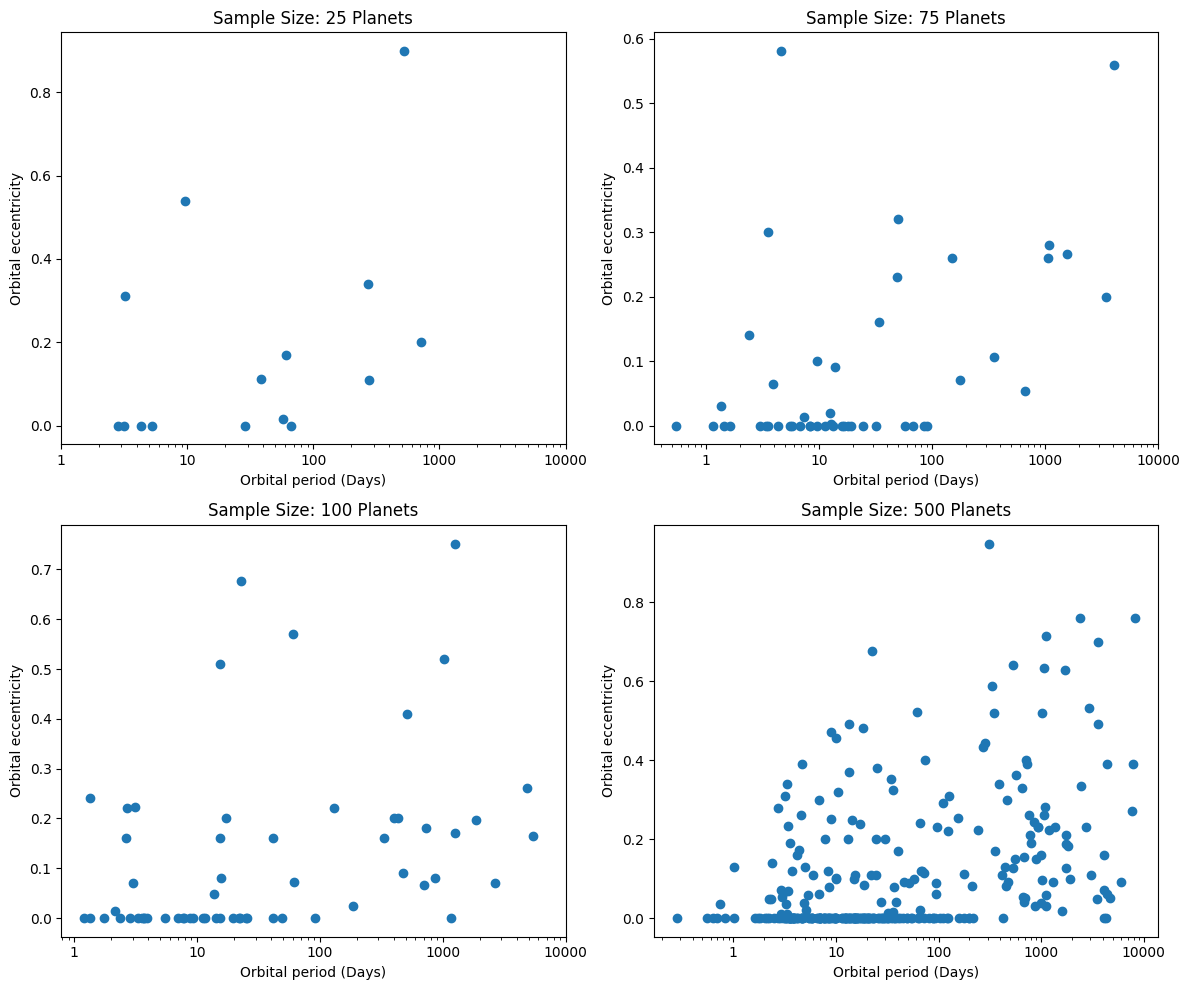

In [8]:
#Check for potential correlations in smaller samples of data

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Import cleaned data
df = pd.read_csv("clean_planets.csv", sep=",")

#Adjust which rows to take; ensure orbper does not go too high
df_adjust = df[(df['pl_orbper'] >= 0) & (df['pl_orbper'] <= 10000)]

#Define our x and y axes
x = df_adjust['pl_orbper']
y = df_adjust['pl_orbeccen']

#Specify sizes for data samples
samples = [25, 75, 100, 500]
#Create subplots for each sample size
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#Iterate through sample sizes -> create plot based each sample
for i, ax in enumerate(axs.flat):
    sample_size = samples[i]
    rand_sc = df_adjust.sample(n=sample_size, random_state=i * 2)
    x_sample = rand_sc['pl_orbper']
    y_sample = rand_sc['pl_orbeccen']
    ax.scatter(x_sample, y_sample)
    ax.set_title(f"Sample Size: {sample_size} Planets")
    ax.set_xlabel("Orbital period (Days)")
    ax.set_ylabel("Orbital eccentricity")
    ax.set_xscale('log')
    ax.set_xticks([1, 10, 100, 1000, 10000])
    ax.set_xticklabels(['1', '10', '100', '1000', '10000'])

plt.tight_layout()
plt.show()

***

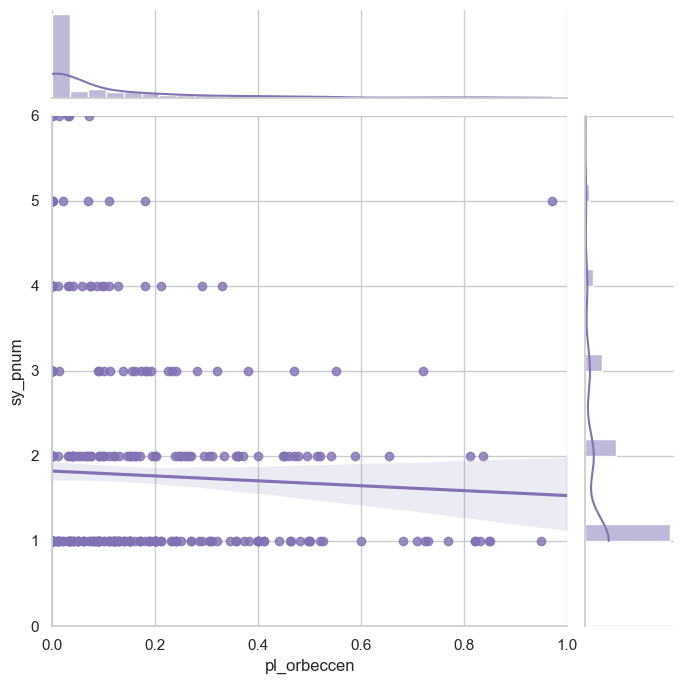

In [47]:
import pandas as pd
import seaborn as sns

#
sns.set_theme(style="whitegrid")

df = pd.read_csv("clean_planets.csv", sep=",")
rand_sc = df.sample(n=1000, random_state=13)

g = sns.jointplot(x="pl_orbeccen", y="sy_pnum", data=rand_sc,
                  kind="reg", truncate=False,
                  xlim=(0, 1), ylim=(0, 6),
                  color="m", height=7)

# Sources

**Ollivier, M., Encrenaz, T., Roques, F., Selsis, F., & Casoli, F. (2009).** *Planetary systems: Detection, formation and habitability of Extrasolar Planets.* **Springer. (p. 78-80)**